<a href="https://colab.research.google.com/github/greyhound101/Data_Science_bowl-2019/blob/master/squeezenet_fold_2_43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Mounted at /content/gdrive


In [5]:
pip install git+https://github.com/rcmalli/keras-squeezenet.git

  Cloning https://github.com/rcmalli/keras-squeezenet.git to /tmp/pip-req-build-r6cuf67b
  Running command git clone -q https://github.com/rcmalli/keras-squeezenet.git /tmp/pip-req-build-r6cuf67b
  Created wheel for keras-squeezenet: filename=keras_squeezenet-0.4-cp36-none-any.whl size=4425 sha256=660b28116b7da82d179bf34df064ed2945526d82dddd47bfe3cd2c1283ec056e
  Stored in directory: /tmp/pip-ephem-wheel-cache-6pmeqq9c/wheels/15/75/ed/45fffbc76d921a5be07af533b774b35bbf40551334c51af91f
Successfully built keras-squeezenet


In [0]:
import numpy as np
from keras_squeezenet import SqueezeNet
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image

In [0]:

from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model
import keras
import pandas as pd
from keras.applications.nasnet import NASNetMobile, preprocess_input
import imgaug as ia
from imgaug import augmenters as iaa
import h5py
from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model


In [0]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [0]:
import zipfile
import h5py
from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model
import keras
import pandas as pd
import imgaug as ia
from imgaug import augmenters as iaa

import zipfile
import h5py
from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

#shuffle samples
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]



#change targets
def change(img):
    resized = cv2.resize(img, (227,227), interpolation = cv2.INTER_AREA )
    return resized




#get train and test splits
def get_trn_tst(df,tst_fold):
  dimension=227
  idx=np.asarray(df['fold'])
  y=np.asarray(df['label'])
  y-=1
  img=np.asarray(df['image'])
  img1=[]
  for i in img:
    img1.append(change(i))
  img1=np.asarray(img1)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],dimension,dimension,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],dimension,dimension,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())
  

In [10]:
mod=SqueezeNet(include_top=True, weights='imagenet')
mod.summary()

5062656/5059384 [==============================] - 1s 0us/step
Model: "squeezenet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 227, 227, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 113, 113, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
relu_conv1 (Activation)         (None, 113, 113, 64) 0           conv1[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 56, 56, 64)   0           relu_conv1[0][0]                 
__________________________

In [0]:

def load_model(last=True):   
  mod=SqueezeNet(include_top=True, weights='imagenet')
  out_1=mod.layers[-5]
  gbl=GlobalAveragePooling2D()(out_1.output)
  out=Dense(3,activation='softmax')(gbl)
  model=Model(inputs=mod.input,outputs=out)
  
  if last:
    for i in range(len(model.layers)):
        model.layers[i].trainable = False
  model.layers[-1].trainable=True

  return model

In [0]:
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result
def Hflip( images):
		seq = iaa.Sequential([iaa.Fliplr(1.0)])
		return seq.augment_images(images)
def Vflip( images):
		seq = iaa.Sequential([iaa.Flipud(1.0)])
		return seq.augment_images(images)
def noise(images):
    ls=[]
    for i in images:
        x = np.random.normal(loc=0, scale=0.05, size=(299,299,3))
        ls.append(i+x)
    return ls
def rotate(images):
    ls=[]
    for angle in range(-15,20,5):
        for image in images:
            ls.append(rotate_image(image,angle))
    return ls

class DataGenerator(keras.utils.Sequence):
  def __init__(self, images, labels, batch_size=64, image_dimensions = (96 ,96 ,3), shuffle=False, augment=False):
    self.labels       = labels              # array of labels
    self.images = images        # array of image paths
    self.batch_size   = batch_size          # batch size
    self.on_epoch_end()

  def __len__(self):
    return int(np.floor(self.labels.shape[0] / self.batch_size))

  def on_epoch_end(self):
    self.indexes = np.arange(self.labels.shape[0])

  def __getitem__(self, index):
		# selects indices of data for next batch
    indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
    # select data and load images
    labels = self.labels.loc[indexes]
    img = [self.images[k].astype(np.float32) for k in indexes]
    imgH=Hflip(img)
    imgV=Vflip(img)
    imgR=rotate(img)
    images=[]
    images.extend(imgH)
    images.extend(imgV)
    images.extend(imgR)
    lbl=labels.copy()
    labels=pd.DataFrame()
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    labels=pd.concat([labels,lbl],0)
    del([imgV,imgR,imgH,lbl])
    gc.collect()
    #images = np.array([preprocess_input(img) for img in images])
    return np.asarray(images).astype('float32'), labels.astype('uint8')

In [0]:
best_accuracy_last={}
final_accuracy_last={}
history_last={}
answers_last={}
predictions_last={}
predictions_last_best={}
times_last={}

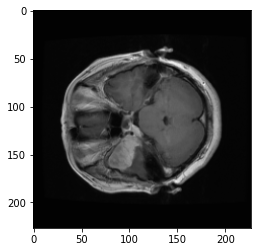

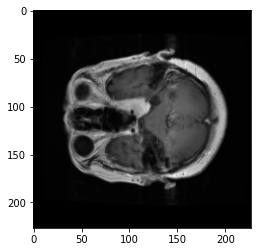

Epoch 1/50
596/596 [==============================] - 118s 198ms/step - loss: 0.6273 - accuracy: 0.7210
Epoch 2/50
596/596 [==============================] - 111s 186ms/step - loss: 0.3569 - accuracy: 0.8500
Epoch 3/50
596/596 [==============================] - 110s 185ms/step - loss: 0.2861 - accuracy: 0.8894
Epoch 4/50
596/596 [==============================] - 110s 184ms/step - loss: 0.2294 - accuracy: 0.9120
Epoch 5/50
596/596 [==============================] - 110s 184ms/step - loss: 0.1605 - accuracy: 0.9404
Epoch 6/50
596/596 [==============================] - 109s 183ms/step - loss: 0.1475 - accuracy: 0.9454
Epoch 7/50
596/596 [==============================] - 109s 183ms/step - loss: 0.1163 - accuracy: 0.9542
Epoch 8/50
596/596 [==============================] - 109s 183ms/step - loss: 0.1002 - accuracy: 0.9647
Epoch 9/50
596/596 [==============================] - 109s 182ms/step - loss: 0.0891 - accuracy: 0.9667
Epoch 10/50
596/596 [==============================] - 110s 184m

36

In [14]:
  from keras.callbacks import *
  es=EarlyStopping(mode='min',monitor='loss',patience=5)
  def upd(dk,data):
    if dk==0:
        dk=data
    else:
        for ky in data.keys():
            dk[ky].extend(data[ky])
    return dk
  index=2
  epoch=50
  pre_acc=0
  best=0
  fold='fold_'+str(index)
  trn,tst=get_trn_tst(df,index)
  history_last[fold]=0



  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()



  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])



  model=load_model(last=False)


  
  #compiling the model
  model.compile(optimizer=Adam(3e-4,decay=1e-3), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  train_data = DataGenerator(trn_x,pd.get_dummies(trn_y), batch_size=4, augment=True)
  ln=len(trn_y)
  del([trn_x,trn_y,trn,tst])
  gc.collect()
  #fitting the model
  #timing
  start=time.time()
  hist=model.fit_generator(train_data,epochs=50,callbacks=[es],steps_per_epoch=ln//4)
  pre=model.predict(tst_x)
  pre=np.argmax(pre,1)
  new_acc=accuracy_score(pre,tst_y)
  if new_acc>best:
            best_accuracy_last[fold]=new_acc
            best=new_acc
            predictions_last_best[fold]=pre
  history_last[fold]=upd(history_last[fold],hist.history)

  end=time.time()
  times_last[fold]=end-start

  #getting the prediction 
  pre=model.predict(tst_x)
  



  #select the maximum position
  pre=np.argmax(pre,1)
  predictions_last[fold]=pre

  
  
  
  #getting the accuracy
  new_acc=accuracy_score(pre,tst_y)

  


  #storing the predictions
  final_accuracy_last[fold]=new_acc








  #storing the answers
  answers_last[fold]=tst_y
    
    
    
    
  #freeing memory
  del([tst_x,tst_y])
  gc.collect()


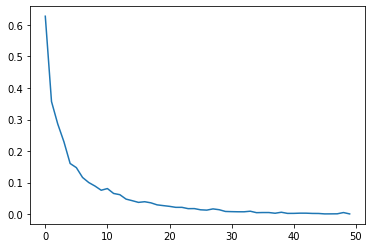

In [15]:
plt.plot(history_last[fold]['loss'])

In [0]:
index=str(index)
type='decay_145'
model='squeezenet'
path = F"/content/gdrive/My Drive/"+model 
np.save(path+"/best_accuracy_all_fold_"+index+"_"+model+"_"+type+".npy",best_accuracy_last)
np.save(path+'/final_accuracy_all_fold'+index+"_"+model+"_"+type+".npy",final_accuracy_last)
np.save(path+'/history_all_fold_'+index+"_"+model+"_"+type+".npy",history_last)
np.save(path+'/answers_all_fold_'+index+"_"+model+"_"+type+".npy",answers_last)
np.save(path+'/predictions_all_fold_'+index+"_"+model+"_"+type+".npy",predictions_last)
np.save(path+'/predictions_all_best_fold_'+index+"_"+model+"_"+type+".npy",predictions_last_best)
np.save(path+'/times_all_fold_'+index+"_"+model+"_"+type+".npy",times_last)